In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [5]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


In [6]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [10]:
print(type(y_train)) , print(np.unique(y_train)) , print(len(np.unique(y_train))) 

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
10


(None, None, None)

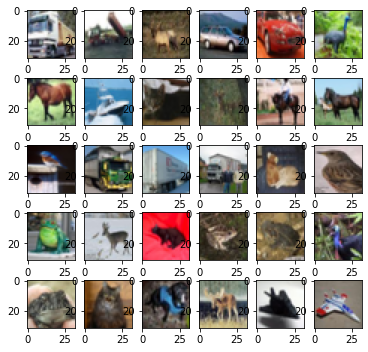

In [13]:
fig = plt.figure(figsize=(6,6))
columns = 6
rows = 5
for i in range(1, columns*rows + 1):
  img = x_train[i]
  fig.add_subplot(rows, columns, i)
  plt.axis("on")
  plt.imshow(img)
plt.show()

In [14]:
print(x_train.max())
print(x_test.max())

255
255


In [15]:
x_train = x_train/255
x_test = x_test/255

In [17]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [23]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
model = Sequential([
                    Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)),
                    MaxPooling2D((2,2)),

                    Conv2D(64, (5,5), activation='relu'),
                    MaxPooling2D((2,2)),
                    Dropout(0.3),

                    Conv2D(128, (3,3), activation='relu'),
                    MaxPooling2D((2,2)),
                    Dropout(0.3),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    Dropout(0.3),
                    Dense(10, activation='softmax')

])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)        

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [38]:
history = model.fit(x_train,
          y_cat_train,
          batch_size=128,
          epochs=25,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/25
391/391 [==============================] - 66s 168ms/step - loss: 0.7960 - accuracy: 0.7288 - val_loss: 0.9062 - val_accuracy: 0.6923
Epoch 2/25
391/391 [==============================] - 66s 168ms/step - loss: 0.7974 - accuracy: 0.7273 - val_loss: 0.8521 - val_accuracy: 0.7057
Epoch 3/25
391/391 [==============================] - 66s 168ms/step - loss: 0.7890 - accuracy: 0.7274 - val_loss: 0.8679 - val_accuracy: 0.6961
Epoch 4/25
391/391 [==============================] - 66s 168ms/step - loss: 0.7998 - accuracy: 0.7267 - val_loss: 0.9006 - val_accuracy: 0.6923
Epoch 5/25
391/391 [==============================] - 66s 168ms/step - loss: 0.7919 - accuracy: 0.7291 - val_loss: 0.8452 - val_accuracy: 0.7092
Epoch 6/25
391/391 [==============================] - 66s 169ms/step - loss: 0.7825 - accuracy: 0.7343 - val_loss: 0.8498 - val_accuracy: 0.7107
Epoch 7/25
391/391 [==============================] - 66s 169ms/step - loss: 0.7842 - accuracy: 0.7297 - val_loss: 0.8547 - val_ac

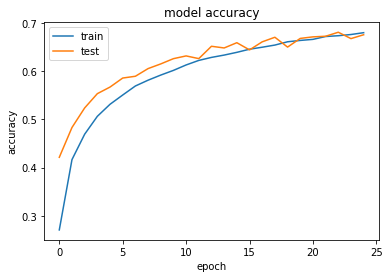

In [33]:
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

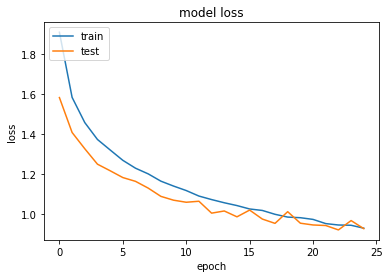

In [34]:
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.8363049030303955, 0.7181000113487244]


In [40]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1000
           1       0.87      0.83      0.85      1000
           2       0.68      0.57      0.62      1000
           3       0.50      0.60      0.55      1000
           4       0.62      0.71      0.66      1000
           5       0.75      0.51      0.60      1000
           6       0.75      0.80      0.77      1000
           7       0.78      0.73      0.76      1000
           8       0.82      0.80      0.81      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [42]:
confusion_matrix(y_test,predictions)

array([[803,  17,  34,  10,  17,   1,  12,  14,  63,  29],
       [ 25, 833,   4,   8,   1,   2,  11,   2,  23,  91],
       [ 79,   7, 570,  68, 109,  36,  71,  31,  12,  17],
       [ 19,   8,  63, 601,  81,  93,  66,  30,  13,  26],
       [ 31,   2,  42,  76, 711,   7,  60,  54,  12,   5],
       [ 16,   3,  40, 268,  69, 508,  21,  60,   5,  10],
       [ 12,   6,  41,  79,  47,   4, 796,   8,   3,   4],
       [ 26,   2,  23,  61,  92,  27,   9, 735,   2,  23],
       [ 88,  29,  10,  15,  11,   0,   6,   2, 796,  43],
       [ 34,  52,   8,  14,   5,   2,   9,  11,  37, 828]])

In [43]:
classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

d = dict(zip(classes, class_names))

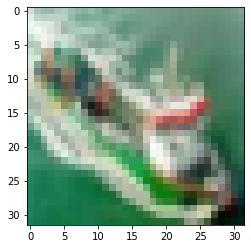

In [46]:
my_image = x_test[15]
plt.imshow(my_image)

In [48]:
input_img = my_image.reshape(1,32,32,3)
predictions = np.argmax(model.predict(input_img), axis=-1)[0]
print(f"True class: {d[y_test[15][0]]} \n\nPredicted class: {d[predictions]}")

True class: ship 

Predicted class: ship
